<a href="https://colab.research.google.com/github/gptix/DS-Unit-2-Linear-Models/blob/master/module4-logistic-regression/Jud_Taylor_assignment_regression_classification_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


# Assignment 🌯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?



## Prepare import path based on environment.

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

## Import useful libraries.

In [0]:
# Import useful libraries.
import pandas as pd
import numpy as np

import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

## Load raw data.

In [0]:
# Load data downloaded from https://srcole.github.io/100burritos/
raw_df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

## Make a working copy of raw data.

In [0]:
# Make a working copy of the raw df.
df = raw_df

## Review dataframe.

In [46]:
# Review dataframe.
# df
# df.describe()
# df.describe().T
# df.head()
# df.tail()
# df.columns
# df.dtypes
df.shape
# df.columns.isna()
# df.isna()

(423, 66)

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.



## Engineer data.

In [0]:
# Replace spaces in column names to underbars
df.columns = [col.replace(' ', '_') for col in df]
# df.columns
# df.head()

In [0]:
# Convert ingredients columns to one-hot encodings

ingredients = ['Beef','Pico','Guac','Cheese','Fries','Sour_cream','Pork','Chicken',
               'Shrimp','Fish','Rice','Beans','Lettuce','Tomato','Bell_peper',
               'Carrots','Cabbage','Sauce','Salsa.1','Cilantro','Onion',
               'Taquito','Pineapple','Ham','Chile_relleno','Nopales','Lobster',
               'Queso','Egg','Mushroom','Bacon','Sushi','Avocado','Corn',
               'Zucchini']

# quick utility
def check_uniques():
  '''List unique values in columns.'''
  for i in ingredients:
    print(i + str(df[i].unique()))     

In [0]:
# check_uniques()

In [0]:
# Replace non-zeroes in columns with ones  
for i in ingredients:
  df[i] = df[i].map({'x': 1, 'X': 1})

# check_uniques()

In [0]:
# Replace NaN's with 0
for i in ingredients:
  df[i] = df[i].fillna(0)
# check_uniques()

In [52]:
# We will use an 'overall' value as 'Great', which will be encoded as True/1
# Drop unrated burritos.
df = df.dropna(subset=['overall'])

# Add a feature to hold TF for 'Great'
df['Great'] = df['overall'] >= 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
# df.Great

In [54]:
# Clean/combine the Burrito categories

# make all text in 'Burrito' column lowercase, to simplify manipulaton.
df['Burrito'] = df['Burrito'].str.lower()

# define predicates (Y/N tests)
california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

# Apply predicates, and apply catchall for remainder
df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
# df.Burrito

In [0]:
# Drop some high cardinality categoricals
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

In [0]:
# Drop some columns to prevent "leakage"
df = df.drop(columns=['Rec', 'overall'])

## Split into Train, Validate, Test sets
- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.

In [58]:
# Create a field to hold year.
df['Year'] = pd.DatetimeIndex(  pd.to_datetime(df['Date'], format='%m/%d/%Y')  ).year
df['Year']

0      2016
1      2016
2      2016
3      2016
4      2016
       ... 
418    2019
419    2019
420    2019
421    2019
422    2019
Name: Year, Length: 421, dtype: int64

In [59]:
train = df[df['Year'] <= 2016]
val = df[df['Year'] == 2017]
test = df[df['Year'] >= 2018]

shapes = train.shape, val.shape, test.shape
df.shape
# shapes

df.isna().sum()

Burrito             0
Date                0
Yelp              334
Google            334
Chips             395
Cost                7
Hunger              3
Mass_(g)          399
Density_(g/mL)    399
Length            138
Circum            140
Volume            140
Tortilla            0
Temp               20
Meat               14
Fillings            3
Meat:filling        9
Uniformity          2
Salsa              25
Synergy             2
Wrap                3
Unreliable        388
NonSD             414
Beef                0
Pico                0
Guac                0
Cheese              0
Fries               0
Sour_cream          0
Pork                0
Chicken             0
Shrimp              0
Fish                0
Rice                0
Beans               0
Lettuce             0
Tomato              0
Bell_peper          0
Carrots             0
Cabbage             0
Sauce               0
Salsa.1             0
Cilantro            0
Onion               0
Taquito             0
Pineapple 

In [60]:
# Drop columns with large numbers of NaN's
# drop_because_too_many_NaNs = ['Yelp', 'Google', 'Chips', 'Mass_(g)', 
#                               'Density_(g/mL)', 'Length', 'Circum', 'Volume', 
#                               'Unreliable', 'NonSD']

# df = df.drop(columns=drop_because_too_many_NaNs)
df.shape

(421, 60)

In [61]:
df.isna().sum()
# df['Temp'].isna().count()
df.dtypes

Burrito            object
Date               object
Yelp              float64
Google            float64
Chips              object
Cost              float64
Hunger            float64
Mass_(g)          float64
Density_(g/mL)    float64
Length            float64
Circum            float64
Volume            float64
Tortilla          float64
Temp              float64
Meat              float64
Fillings          float64
Meat:filling      float64
Uniformity        float64
Salsa             float64
Synergy           float64
Wrap              float64
Unreliable         object
NonSD              object
Beef              float64
Pico              float64
Guac              float64
Cheese            float64
Fries             float64
Sour_cream        float64
Pork              float64
Chicken           float64
Shrimp            float64
Fish              float64
Rice              float64
Beans             float64
Lettuce           float64
Tomato            float64
Bell_peper        float64
Carrots     

In [62]:
# Drop rows with NaN
df = df.dropna()
df.shape

(0, 60)

## Baseline classification
- [ ] Begin with baselines for classification.

In [63]:
target = 'Great'
y_train = train[target]
print(y_train.shape)
split_train = y_train.value_counts(normalize=True)
great_percentage_train = split_train[1]*100
baseline = y_train.mode().values[0]
print("Baseline: is it great?  - " + str(baseline))
print("Percentage of great burritos: " + str(round(great_percentage_train, 2)))

(298,)
Baseline: is it great?  - False
Percentage of great burritos: 40.94


In [64]:
# Test baseline against val set
y_val = val[target]
print(y_val.shape)
split_val = y_val.value_counts(normalize=True)
# y_val.value_counts(normalize=True)

great_percentage_val = split_val[1]*100
print("Percentage of great burritos: " + str(round(great_percentage_val, 2)))
# print("Difference between ")


(85,)
Percentage of great burritos: 44.71


## Logistic Regression
- [ ] Use scikit-learn for logistic regression.

In [76]:
features = ['Burrito', 'Cost', 'Hunger', 'Tortilla', 'Temp', 'Meat', 'Fillings', 
            'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'Beef', 'Pork', 
            'Chicken', 'Shrimp', 'Fish']

target = 'Great'

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

log_reg = LogisticRegression(solver='lbfgs')

X_train.shape, y_train.shape, X_val.shape, y_val.shape

X_train.head()

,Burrito,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Uniformity,Salsa,Synergy,Wrap,Beef,Pork,Chicken,Shrimp,Fish
0,California,6.49,3.0,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0
1,California,5.45,3.5,2.0,3.5,2.5,2.5,4.0,3.5,2.5,5.0,1.0,0.0,0.0,0.0,0.0
2,Carnitas,4.85,1.5,3.0,2.0,2.5,3.0,4.0,3.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0
3,Asada,5.25,2.0,3.0,2.0,3.5,3.0,5.0,4.0,4.0,5.0,1.0,0.0,0.0,0.0,0.0
4,California,6.59,4.0,4.0,5.0,4.0,3.5,5.0,2.5,4.5,4.0,1.0,0.0,0.0,0.0,0.0


In [0]:
# log_reg.fit(X_train, y_train)
# print('Validation Accuracy', log_reg.score(X_val_imputed, y_val))

In [0]:
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_train_encoded.head()

In [0]:
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)
X_train_imputed[:5]

In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

In [0]:
X_train_scaled[:5]

In [94]:
model= LogisticRegressionCV(cv=5)
model.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

- [ ] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)


In [93]:
print('Validtion accuracy', model.score(X_val_scaled, y_val))

Validtion accuracy 0.8117647058823529


- [ ] Get your model's test accuracy. (One time, at the end.)

In [99]:
X_test = test[features]
y_test = test[target]

X_test_encoded = encoder.fit_transform(X_test)
X_test_imputed = imputer.fit_transform(X_test_encoded)
X_test_scaled = scaler.fit_transform(X_test_imputed)


print('Test accuracy', model.score(X_test_scaled, y_test))

Test accuracy 0.7368421052631579


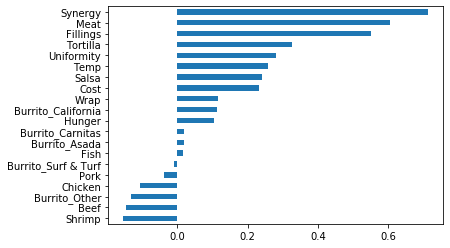

In [97]:
pd.Series(model.coef_[0], X_train_encoded.columns).sort_values().plot.barh()

- [ ] Commit your notebook to your fork of the GitHub repo.
**Done**

## Stretch Goals

- [ ] Add your own stretch goal(s) **Done (trnsformed fillings to numeric by hnd)**
- [ ] Make exploratory visualizations. **Done**
- [ ] Do one-hot encoding. **Done**
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html). **Done**
- [ ] Get and plot your coefficients. **Done**
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).